# Projet : le jeu d'Othello

## Régles du jeu

Le jeu se joue sur un plateau de taille $8\times 8$. Au début du jeu, la position est la suivante

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def tracerPlateau(A):
    n, m = A.shape
    
    plt.xlim(-0.5, n - 0.5)
    plt.ylim(m - 0.5, -0.5)
    
    plt.xticks(np.arange(-0.5, n - 0.5, 1))
    plt.yticks(np.arange(-0.5, m - 0.5, 1))
    plt.tick_params(which = 'major', labelbottom = False, labelleft = False)
    plt.gca().xaxis.tick_top()

    plt.minorticks_on()
    plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
    plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))
    plt.gca().xaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))
    plt.gca().yaxis.set_minor_formatter(plt.FormatStrFormatter('%d'))

    plt.tick_params(which = 'minor', top = False, left = False, labeltop = True)

    plt.grid()
    
    N = np.array([[i, j] for i in range(n) for j in range(m) if A[i, j] == 1])
    B = np.array([[i, j] for i in range(n) for j in range(m) if A[i, j] == -1])
    if N.shape[0] > 0:
        plt.scatter(N[:, 1], N[:, 0], marker='o', s = 400, c = 'r')
    if B.shape[0] > 0:
        plt.scatter(B[:, 1], B[:, 0], marker='o', s = 400, c = 'b')

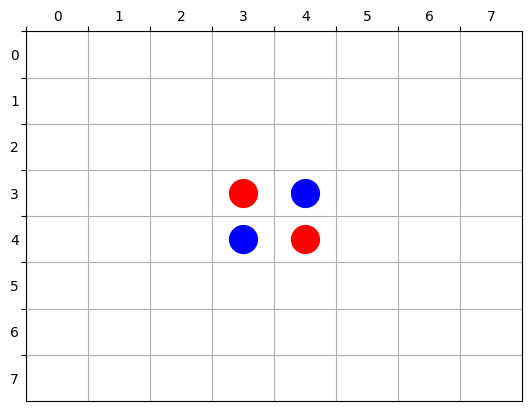

In [3]:
c = 1
A = np.zeros((8,8), int)
A[3,3] = 1
A[3,4] = -1
A[4,3] = -1
A[4,4] = 1
tracerPlateau(A)

Le joueur rouge joue en premier. Les régles pour changer la couleur des pions sont celles présentées dans le TP7. On ajoute de plus les régles suivantes :
* à chaque tour, le pion posé doit *toujours* changer la couleur d'*au moins un pion adverse*. Si aucun coup ne respecte cette régle, le joueur doit passer son tour (le plateau ne change pas et c'est au tour de l'adversaire de jouer).
* si aucun des deux joueur ne peux jouer, la partie s'arrête, même s'il reste encore des cases vides sur le plateau.

À la fin de la partie, le joueur qui gagne est celui qui a le plus de pions de sa couleur sur le plateau.

## But du projet

Le but du projet est de programmer une fonction permettant de jouer le mieux possible. Vous devez :
* implémenter les régles du jeu dans une fonction de transition (attention à bien ajouter les nouvelles régles !).
* jouer un grand nombre de partie au hasard, puis à l'aide de la méthode d'apprentissage supervisée de votre choix, fabriquer une fonction de score qui permet d'évaluer une position.
* utiliser cette fonction de score pour implémenter une fonction permettant de jouer à l'aide de l'algorithme MinMax ou Alpha–Beta.
* si possible, proposer et implémenter une méthode de votre choix pour améliorer la fonction de score, ou l'algorithme qui calcul le meilleur coup.

## Rendu

Votre rendu doit être sous une des deux formes suivantes :
* un notebook avec votre code python ainsi que les explications de votre méthode.
* un notebook avec uniquement le code, et un fichier `.pdf` avec vos explications.

Vous devez fournir une fonction une fonction de la forme suivante

In [4]:
def coup_suivant(A, c):
    ...

qui prend en argument la configuration `A` du plateau (sous forme d'un tableau comme dans le TP7) et la couleur `c` du joueur qui doit jouer, et qui renvoit la configuration `A1` du plateau après avoir jouer le coup déterminer par votre algorithme. Si tous le monde respecte cette forme, cela permettra d'organiser un tournoi entre vos algorithmes. Cette fonction devra s'exécuter en un temps raisonnable, disons au  maximum ~10 secondes. Bien sûr, ce temps va dépendre de l'ordinateur qui fait le calcul ! Vous devez donc fixer une profondeur de calcul raisonnable pour l'algorithme MinMax.

Dans votre compte rendu, vous devrez expliquer les choix techniques que vous avez fait : combien de partis aléatoire joue t-on ? quelle profondeur pour MinMax ? quelle méthode d'apprentissage supervisé ? Si vous avez testé plusieurs méthode pour calculer un score, vous devez les comparer.

Votre code doit fonctionnner en exécutant les cellules une par une en partant de la première. Vous pouvez tester que cela marche bien en utilisant la touche ⏩ de Jupyter. 

La note portera :
* à 50% sur la qualité de vos explications de la méthodes choisie.
* à 30% sur la qualité et la clarté du code en Python.
* à 20% sur la proposition et l'implémentation d'une méthode pour améliorer votre algorithme.

Respecter la forme de la fonction `coup_suivant` pour pouvoir participer au tournoi sera valorisé de quelques points bonus.

## Extraire une analyse discriminante

Si vous faites une analyse discriminante avec Scikit, et que vos données sont déterminées aléatoirement, je n'aurais pas en corrigeant les même données que vous, et donc pas la même fonction d'évaluation. Vous pouvez alors 
* écrire vos données dans le notebook (mais il me faut quand même le code pour les fabriquer !)
* extraire simplement la matrice de la projection associée à votre analyse discriminante, à l'aide de la méthode `lda.scalings_`

Les deux codes suivant sont équivalents :
```
lda.fit(X)
U = lda.transform(X)
```
et 
```
lda.fit(X)
P = lda.scalings_
U = X @ P
```
La matrice de la projection `P` est de petite taille.

Idéalement, votre fonction `coup_suivant` sera «autonome» et ne dependra pas d'un long calcul préalable. Contacter moi si vous avez du mal à extraire le résultat de votre calcul préparatoire.